In [62]:
import os
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotnine import *

In [2]:
genome = 'MIT1214' # select genome / strain of cyanobacteria to check GIs of

# establish datapaths
datapath99 = '../data/cycogs/cycogsgenomes.tsv'
genomes_df = pd.read_csv(datapath99, sep='\t')
for index, row in genomes_df.iterrows():
    if row['IID'] == genome:
        filetarget = row['IMG_ID']

datapath = ('data/0/1-s2.0-S0092867422015197-mmc2.csv') # genome island coordinates
datapath2 = (f'../data/img_data_cycog6/{filetarget}/{filetarget}.gff') # dependent on genome being searched, location subject to change
datapath3 = ('../data/cycogs/ortholog-metadata.csv') # matches geneID to cycog number
datapath4 = ('data/0/pro2_genes.csv') # alternative dataset for putative island genes

# create dataframes from datapaths
cycogs_df = pd.read_csv(datapath3)
pro2_genes_df = pd.read_csv(datapath4)
# datapath 2 has a file that can't be cleanly converted into a dataframe, so it is read in manually later in the notebook
gi_locations_df = pd.read_csv(datapath)
genome_islands_df = gi_locations_df[gi_locations_df['genome_id'] == f'{genome}']
display(genome_islands_df)

,genome_id,contig_id,start,end
5032,MIT1214,MIT1214_1,37042,85326
5033,MIT1214,MIT1214_1,1245133,1294544
5034,MIT1214,MIT1214_1,1321873,1345621
5035,MIT1214,MIT1214_1,1358207,1427056
5036,MIT1214,MIT1214_1,1522931,1548933
5037,MIT1214,MIT1214_1,1627383,1648169
5038,MIT1214,MIT1214_1,1681122,1696438
5039,MIT1214,MIT1214_1,1802448,1834602
5040,MIT1214,MIT1214_1,104128,129381
5041,MIT1214,MIT1214_1,414186,427404


This notebook is derived from methods used in [Hackl et al., 2023](https://www.cell.com/cell/pdf/S0092-8674(22)01519-7.pdf). 

Predicted genomic island coordinates in cyanobacterial genomes: [File 2 of supplemental materials](https://ars.els-cdn.com/content/image/1-s2.0-S0092867422015197-mmc2.xlsx)

Using these hypothetical genomic island coordinates, we aim to cross-reference genes that fall within these coordinates with another dataset categorizing genes overexpressed in high exposure to cyanophages. If the genes are in both datasets, it provides additional evidence that these are 'defense island' genes.

In [104]:

start_points = genome_islands_df.start.to_list()
end_points = genome_islands_df.end.to_list()

island_ids = []

# Open and read the file line by line
with open(datapath2, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) > 3: # skip first row
            start = int(parts[3])
            end = int(parts[4])
            
            # Check if the start and end fall within any of the specified ranges
            for start_point, end_point in zip(start_points, end_points):
                # print ((start, type(start), end_point, type(end_point)))
                if start_point <= start <= end_point or start_point <= end <= end_point:
                # if start >= start_point
                    island_ids.append(parts[8].split('=')[1].split(';')[0])
                    break  # Break the loop once a match is found

island_ids = [int(i) for i in island_ids]
print ("Done :)")
print (island_ids)

Done :)
[2684586588, 2684586589, 2684586590, 2684586591, 2684586592, 2684586593, 2684586594, 2684586595, 2684586596, 2684586597, 2684586598, 2684586599, 2684586600, 2684586601, 2684586602, 2684586603, 2684586604, 2684586605, 2684586606, 2684586607, 2684586608, 2684586609, 2684586610, 2684586611, 2684586612, 2684586613, 2684586614, 2684586615, 2684586616, 2684586617, 2684586618, 2684586619, 2684586620, 2684586621, 2684586622, 2684586623, 2684586624, 2684586625, 2684586626, 2684586627, 2684586628, 2684586629, 2684586630, 2684586631, 2684586632, 2684586633, 2684586634, 2684586635, 2684586636, 2684586637, 2684586655, 2684586656, 2684586657, 2684586658, 2684586659, 2684586660, 2684586661, 2684586662, 2684586663, 2684586664, 2684586665, 2684586666, 2684586667, 2684586668, 2684586669, 2684586670, 2684586671, 2684586672, 2684586673, 2684586674, 2684586675, 2684586676, 2684586677, 2684586678, 2684586679, 2684586680, 2684586681, 2684586682, 2684586683, 2684586684, 2684587015, 2684587016, 2684587

In [12]:
# get ortholog IDs of island genes

island_cycogs = cycogs_df[(cycogs_df.GenomeName == genome) & (cycogs_df.GeneID.isin(island_ids))].OrthologID.to_list()

print(island_cycogs)

[60000005, 60000012, 60000013, 60000014, 60000022, 60000029, 60000041, 60000043, 60000058, 60000067, 60000077, 60000133, 60000170, 60000185, 60000193, 60000194, 60000208, 60000213, 60000215, 60000220, 60000228, 60000243, 60000264, 60000268, 60000312, 60000392, 60000400, 60000426, 60000453, 60000460, 60000472, 60000478, 60000487, 60000488, 60000531, 60000542, 60000555, 60000558, 60000622, 60000640, 60000650, 60000668, 60000675, 60000791, 60000821, 60000850, 60000905, 60000947, 60000971, 60001206, 60001333, 60001339, 60001542, 60002384]


In [13]:
# get island genes that are also in the pro2 cluster
semi_confirmed = []
pro2_genes_df = pro2_genes_df.sort_values(by=['Ortholog'])
pro2_orthologs = pro2_genes_df['Ortholog']
for ortholog in pro2_orthologs:
    if ortholog in island_cycogs:
        semi_confirmed.append(ortholog)
print (semi_confirmed)

[]


In [14]:
# look at pro2 genes in genomic islands

pro2_genes_df[pro2_genes_df.Ortholog.isin(semi_confirmed)].sort_values('Ortholog', ascending=True)

,Ortholog,MedianWeight,MeanWeight,BootstrapSupport,Annotation


In [88]:
# pro2 genes in genome

cluster_genes = pro2_genes_df[pro2_genes_df.MedianWeight.gt(0)].Ortholog.to_list()

genome_cluster_cycogs = cycogs_df[(cycogs_df.GenomeName == genome) & (cycogs_df.OrthologID.isin(cluster_genes))]

print(len(genome_cluster_cycogs.OrthologID.unique()))
genome_cluster_cycogs

32


,MappingName,OrthologID,GenomeName,GeneID,Annotation
16059,AG-402-C09_2717274261,60000015,AG-402-C09,2717274261,"dTDP-4-amino-4,6-dideoxygalactose transaminase"
28482,AG-402-C09_2717275008,60000028,AG-402-C09,2717275008,Protein of unknown function (DUF3764)
28906,AG-402-C09_2717275329,60000028,AG-402-C09,2717275329,Protein of unknown function (DUF3764)
41293,AG-402-C09_2717274398,60000046,AG-402-C09,2717274398,UDP-glucuronate 4-epimerase
41603,AG-402-C09_2717274404,60000046,AG-402-C09,2717274404,UDP-glucuronate 4-epimerase
83502,AG-402-C09_2717274442,60000126,AG-402-C09,2717274442,UDPglucose 6-dehydrogenase
83607,AG-402-C09_2717274577,60000126,AG-402-C09,2717274577,UDPglucose 6-dehydrogenase
309359,AG-402-C09_2717274465,60000600,AG-402-C09,2717274465,"3'(2'), 5'-bisphosphate nucleotidase"
387656,AG-402-C09_2717273987,60000770,AG-402-C09,2717273987,bacterial nucleoid protein Hbs
436572,AG-402-C09_2717274396,60000878,AG-402-C09,2717274396,UDP-galactose 4-epimerase


From here, the code is intended to work with the number of hits each "cluster cycog" has in each genome in our dataset. The cluster cycogs are the genes or orthologs that have been overexpressed in regions of high cyanophage abundance.

In [3]:
genome_ortholog_dict = {}
genome_list = genomes_df.IID.tolist()
cluster_genes = pro2_genes_df[pro2_genes_df.MedianWeight.gt(0)].Ortholog.to_list()

for genome in genome_list:
    genome_cluster_cycogs = cycogs_df[(cycogs_df.GenomeName == genome) & (cycogs_df.OrthologID.isin(cluster_genes))]
    ortholog_counts = genome_cluster_cycogs['OrthologID'].value_counts().to_dict()
    genome_ortholog_dict[genome] = ortholog_counts

# Step 2: Convert the dictionary of dictionaries to a DataFrame
df1 = pd.DataFrame.from_dict(genome_ortholog_dict, orient='index').fillna(0)
df1 = df1.transpose()
# The DataFrame 'df' now has orthologIDs as the index, genomes as columns, and the counts as the data points
display(df1)

# df1.to_csv('../data/out.csv', index=True)

,AG-311-D23,AG-311-I02,AG-311-J23,AG-311-K14,AG-311-K21,AG-311-L21,AG-311-N19,AG-315-A03,AG-315-B03,AG-315-C08,...,SS120-1,P-SSP3,P-SSP7,P60,S-RIP1,S-RIP2,Syn5,scB241_526B19,S-CBS1,S-CBS3
60001883,5.0,1.0,8.0,1.0,5.0,5.0,2.0,2.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001478,4.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001376,3.0,0.0,5.0,0.0,0.0,0.0,2.0,2.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000028,3.0,2.0,4.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001413,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60008213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60014620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60029571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60012271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
REFS = '../data/img_data_cycog6/'

genome_island_dict = {}

# Loop through each genome in the directory
for genome in os.listdir(REFS):
    # Skip non-directory entries if any
    if not os.path.isdir(os.path.join(REFS, genome)):
        continue
    
    # Path to the GFF file for the current genome
    gff_path = os.path.join(REFS, genome, f'{genome}.gff')

    # Change genome variable to be compatible with gi_locations_df
    genome = int(genome)
    genome = genomes_df[genomes_df.IMG_ID == genome].IID
    genome = genome.tail(1).item()
    # print (type(genome))
    
    # Filter the dataframe for the current genome
    genome_islands_df = gi_locations_df[gi_locations_df['genome_id'] == genome]
    start_points = genome_islands_df.start.to_list()
    end_points = genome_islands_df.end.to_list()

    # Initialize the island_ids list for the current genome
    island_ids = []

    # Open and read the GFF file line by line
    with open(gff_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 3:  # Ensure there are enough parts to parse start and end
                try:
                    start = int(parts[3])
                    end = int(parts[4])
                except ValueError:
                    continue  # Skip lines that do not have valid integers in the expected columns
                
                # Check if the start and end fall within any of the specified ranges
                for start_point, end_point in zip(start_points, end_points):
                    if start_point <= start <= end_point or start_point <= end <= end_point:
                        try:
                            island_id = int(parts[8].split('=')[1].split(';')[0])
                            island_ids.append(island_id)
                        except (IndexError, ValueError):
                            continue  # Skip lines with parsing issues in the 9th column
                        break  # Break the loop once a match is found

    # Store the island_ids list in the dictionary
    genome_island_dict[genome] = island_ids

print (len(genome_island_dict))

non_empty_count = sum(1 for value in genome_island_dict.values() if len(value) > 0)
print(f"Non-empty genomic islands: {non_empty_count}")

# Optionally, print the dictionary to check the results
for genome, ids in genome_island_dict.items():
    print(f'Genome: {genome}, Island IDs: {ids}')

In [5]:

# Initialize the dictionary to store the results
genome_ortholog_dict = {}

# Iterate through genome_island_dict
for genome, gene_ids in genome_island_dict.items():
    ortholog_counts = defaultdict(int)  # Initialize a dictionary to count ortholog IDs
    
    # Iterate through each gene ID for the current genome
    for gene_id in gene_ids:
        # Filter cycogs_df for rows where GeneID matches gene_id
        matching_rows = cycogs_df[cycogs_df.GeneID == gene_id]
        
        # Count occurrences of each OrthologID in the filtered rows
        for ortholog_id in matching_rows.OrthologID:
            ortholog_counts[ortholog_id] += 1
    
    # Store the ortholog_counts dictionary in genome_ortholog_dict under the current genome key
    genome_ortholog_dict[genome] = dict(ortholog_counts)

# Print or use genome_ortholog_dict as needed
# print(genome_ortholog_dict)

df3 = pd.DataFrame.from_dict(genome_ortholog_dict, orient='index').fillna(0)
df3 = df3.transpose()
# The DataFrame 'df' now has genomes as the index, orthologIDs as columns, and the counts as the data points

df4 = df3[df3.index.isin(cluster_genes)]
display(df4)
df4.to_csv('../data/step2.csv', index=True)

,AG-418-D13,AG-412-G19,AG-679-I23,MIT1223,NATL1A,MIT1214,AG-402-G19,MIT0913,AG-311-J23,AG-315-N18,...,AG-388-D03,AG-347-I21,AG-402-L19,AG-347-M15,AG-670-O11,W11,AG-311-K21,AG-347-G18,AG-347-K20,AG-686-P16
60000706,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000770,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001586,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001229,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
average_overlaps = df1.mean(axis=1)
average_overlaps = average_overlaps.sort_index()
average_overlaps2 = df4.mean(axis=1)
average_overlaps2 = average_overlaps2.sort_index()
average_overlaps2 = average_overlaps2.reindex(average_overlaps.index)

combined_df = pd.DataFrame({
    'OrthologID': average_overlaps.index,
    'Genome_copies': average_overlaps.values,
    'Island_copies': average_overlaps2.values
})
display (combined_df)
combined_df.to_csv('../data/ortholog_copies.csv', index=True)

,OrthologID,Genome_copies,Island_copies
0,60000015,1.449036,0.270492
1,60000028,1.596419,0.204918
2,60000046,1.303030,0.204918
3,60000126,0.880165,0.155738
4,60000600,0.634986,0.094262
...,...,...,...
95,60008290,0.005510,0.004098
96,60009768,0.004132,NaN
97,60012271,0.002755,NaN
98,60014620,0.005510,NaN


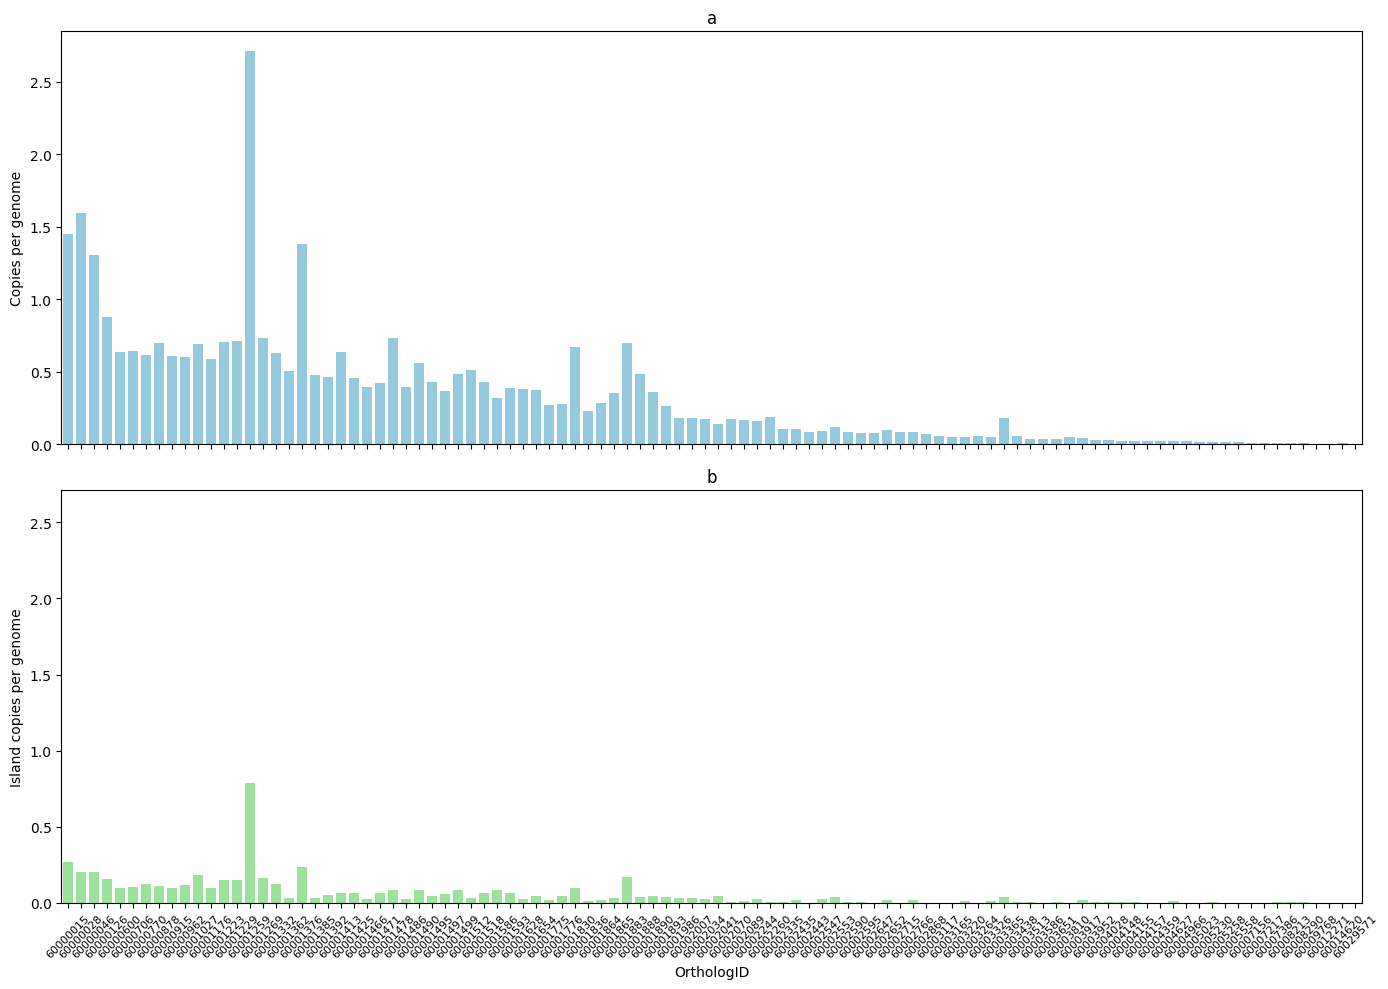

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
max_y = max(combined_df['Genome_copies'].max(), combined_df['Island_copies'].max())


# Plotting the first set of bars
sns.barplot(ax=axes[0], x='OrthologID', y='Genome_copies', data=combined_df, color='skyblue')
axes[0].set_title('a')
axes[0].set_ylabel('Copies per genome')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels

# Plotting the second set of bars
sns.barplot(ax=axes[1], x='OrthologID', y='Island_copies', data=combined_df, color='lightgreen')
axes[1].set_title('b')
axes[1].set_ylabel('Island copies per genome')
axes[1].set_xlabel('OrthologID')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels
axes[1].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

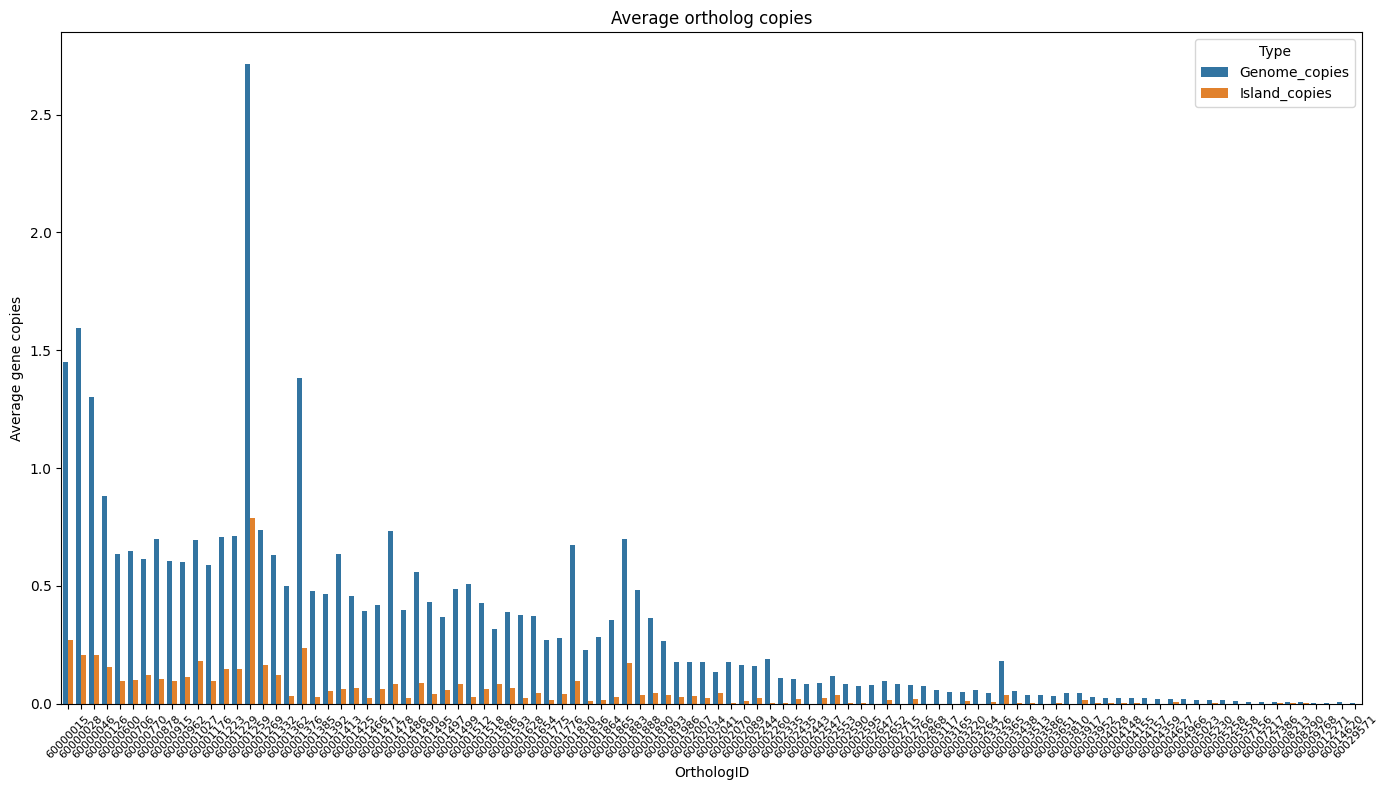

In [68]:
# Melt the DataFrame to long format
melted_df = combined_df.melt(id_vars='OrthologID', value_vars=['Genome_copies', 'Island_copies'],
                             var_name='Type', value_name='Average Overlaps')

# Plotting with seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=melted_df, x='OrthologID', y='Average Overlaps', hue='Type')

# Adding labels and title
plt.xlabel('OrthologID')
plt.ylabel('Average gene copies')
plt.title('Average ortholog copies')
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

Obsolete code, but maybe look at this later

In [111]:
REFS = '../data/img_data_cycog6/'
count = 0
island_ortholog_dict = {}
cluster_genes = pro2_genes_df[pro2_genes_df.MedianWeight.gt(0)].Ortholog.to_list()
for filename in os.listdir(REFS): # for each genome file in the genomes directory:
    gff_path = os.path.join(f'{REFS}{filename}/{filename}.gff')
    filename = int(filename)
    genome = genomes_df[genomes_df.IMG_ID == filename].IID
    genome = genome.tail(1).item()
    genome_islands_df = gi_locations_df[gi_locations_df['genome_id'] == genome]
    start_points = genome_islands_df.start.to_list()
    end_points = genome_islands_df.end.to_list()
    island_ids = []
    with open(gff_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) > 3: # skip first row
                start = int(parts[3])
                end = int(parts[4])
                
                # Check if the start and end fall within any of the specified ranges
                for start_point, end_point in zip(start_points, end_points):
                    if start_point <= start <= end_point or start_point <= end <= end_point:
                        if len(parts) > 8 and '=' in parts[8]:  # Ensure parts[8] exists and contains '='
                            island_ids.append(parts[8].split('=')[1].split(';')[0])
                        break  # Break the loop once a match is found

    island_ids = [int(i) for i in island_ids]
    if island_ids:
        count += 1
        island_cycogs_df = cycogs_df[(cycogs_df.GenomeName == genome) & (cycogs_df.GeneID.isin(island_ids)) & (cycogs_df.OrthologID.isin(cluster_genes))]
        ortholog_counts = island_cycogs_df['OrthologID'].value_counts().to_dict()
        island_ortholog_dict[genome] = ortholog_counts

df2 = pd.DataFrame.from_dict(island_ortholog_dict, orient='index').fillna(0)
df2 = df2.transpose()
# The DataFrame 'df' now has genomes as the index, orthologIDs as columns, and the counts as the data points
print ("# of columns should be", count)
display(df2)
df2.to_csv('../data/tentative.csv', index=True)

# of columns should be 244


,AG-418-D13,MIT1214,AG-347-G20,AG-355-P18,MIT9314,AG-676-L21,MIT9312,AG-402-I21,AG-402-I20,MIT0604,...,AG-436-M02,AG-363-J23,MIT0601,AG-683-O15,AG-418-F08,AG-449-J16,AG-432-K17,AG-679-N02,MIT9302,AG-469-N22
60000706,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001259,0.0,25.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
